# Diagrama de restrições

In [1]:
from DesignParameters import DesignParameters
from AuxiliaryFunctions import ConstraintPoly, PlotSetUp
import matplotlib.pyplot as plt
import numpy as np
import math

Resolution = 2000
Start_Pa = 0.1

Airplane = DesignParameters()


print(Airplane.resume())


--- Peso ---
maxGrossWeight_kg             : 40.000

--- Geometria ---
AR_                           : 13.000

--- Performance ---
ApproachSpeed_KTAS            : 23.261
ApproachSpeed_mps             : 11.966
CDTO_                         : 0.090
CLTO_                         : 0.970
CLmaxApproach_                : 1.300
ClimbSpeed_KCAS               : 46.652
ClimbSpeed_mps                : 24.000
CruisingAlt_ft                : 393.720
CruisingAlt_m                 : 120.000
CruisingSpeed_KTAS            : 58.315
CruisingSpeed_mps             : 30.000
GroundRunTakeOff_ft           : 393.720
GroundRunTakeOff_m            : 120.000
GroundrunLanding_ft           : 229.670
GroundrunLanding_m            : 70.000
ROCAlt_ft                     : 0.000
RateOfClimb_fpm               : 600.000
RateOfClimb_mps               : 3.048
ServiceCeiling_ft             : 393.720
ServiceCeiling_m              : 120.000
StallReserveFactor            : 1.100
StallSpeedLanding_KNOTS       : 21.147
TakeOffE

## Curva nivelada com velocidade constante

![Eq_curva.png](\images\Eq_curva.png)

Curva com angulo de bank de 35°


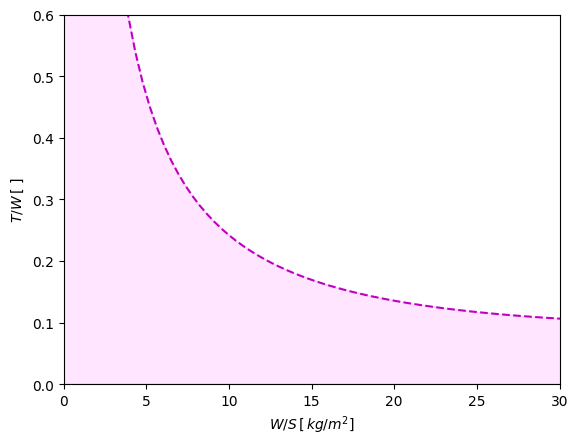

In [2]:
WSlistCVT_Pa = np.linspace(Start_Pa, 8500, Resolution)
TWlistCVT = []

# Calcular T/W normalmente
for i, WS in enumerate(WSlistCVT_Pa):
    TW = Airplane.aero.qCruise_pa * ((Airplane.aero.CDmin_ / WS) + WS * Airplane.aero.k * (Airplane.perf.nTurn_ / Airplane.aero.qCruise_pa)**2)
    TWlistCVT.append(TW)

# Conversão de unidades
WSlistCVT_kgm2 = [x * 0.101971621 for x in WSlistCVT_Pa]

# Ângulo da curva
theta_deg = math.acos(1 / Airplane.perf.nTurn_) * 180 / math.pi
print("Curva com angulo de bank de {:.0f}".format(theta_deg) + u'\xb0')

ConstVeloTurnPoly = ConstraintPoly(WSlistCVT_kgm2, TWlistCVT, 'magenta', 0.1)

figCVT, axCVT = plt.subplots()
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[\\,\\,]$')
axCVT.plot(WSlistCVT_kgm2, TWlistCVT, 'm--')  # linha magenta tracejada
axCVT.add_patch(ConstVeloTurnPoly)



## Razão de subida

![Eq_curva.png](\images\Eq_subida.png)

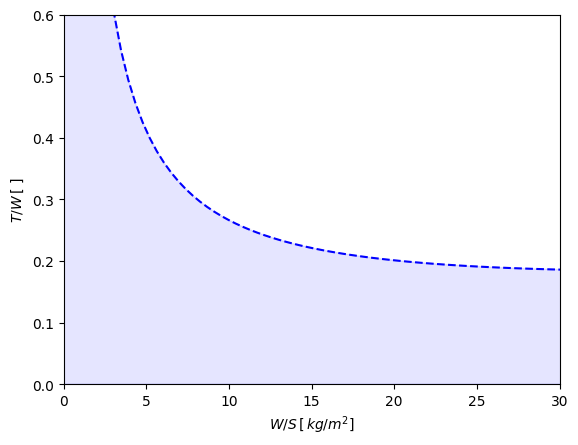

In [3]:
WSlistROC_Pa = np.linspace(Start_Pa, 8500, Resolution)
TWlistROC = []

Airplane.perf.RateOfClimb_fpm = 500  # Exemplo de taxa de subida em m/s

for i, WS in enumerate(WSlistROC_Pa):
    TW = (Airplane.perf.RateOfClimb_mps / Airplane.perf.ClimbSpeed_mps +
          Airplane.aero.CDmin_ * Airplane.aero.qClimb_pa / WS +
          Airplane.aero.k * WS / Airplane.aero.qClimb_pa)
    TWlistROC.append(TW)

WSlistROC_kgm2 = [x * 0.101971621 for x in WSlistROC_Pa]
RateOfClimbPoly = ConstraintPoly(WSlistROC_kgm2, TWlistROC, 'blue', 0.1)

figROC, axROC = plt.subplots()
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[\\,\\,]$')
axROC.plot(WSlistROC_kgm2, TWlistROC, 'b--')
axROC.add_patch(RateOfClimbPoly)

## Decolagem

![Eq_curva.png](\images\Eq_Decolagem.png)

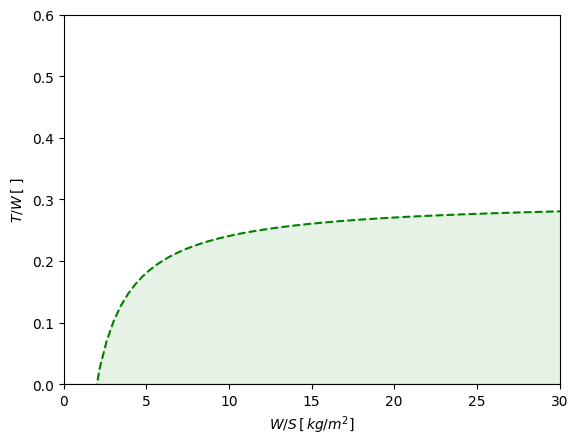

In [ ]:

WSlistGR_Pa = np.linspace(Start_Pa, 8500, Resolution)
TWlistGR = []

for i, WS in enumerate(WSlistGR_Pa):
    TW = (Airplane.perf.TakeOffSpeed_mps**2) / (2 * 9.81 * Airplane.perf.GroundRunTakeOff_m) + \
         Airplane.aero.qTO_pa * Airplane.perf.CDTO_ / WS + \
         Airplane.perf.muTO_ * (1 - Airplane.aero.qTO_pa * Airplane.perf.CLTO_ / WS)
    TWlistGR.append(TW)

WSlistGR_kgm2 = [x * 0.101971621 for x in WSlistGR_Pa]
TORunPoly = ConstraintPoly(WSlistGR_kgm2, TWlistGR, 'green', 0.1)

figTOR, axTOR = plt.subplots()
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[\\,\\,]$')
axTOR.plot(WSlistGR_kgm2, TWlistGR, 'g--')
axTOR.add_patch(TORunPoly)


## Cruseiro

![Eq_curva.png](\images\Eq_cruseiro.png)

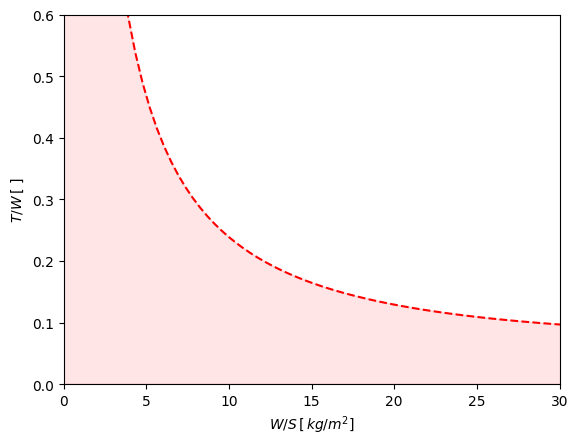

In [5]:
WSlistCR_Pa = np.linspace(Start_Pa, 8500, Resolution)
TWlistCR = []

for WS in WSlistCR_Pa:
	TW = Airplane.aero.qCruise_pa * (Airplane.aero.CDmin_ / WS) + Airplane.aero.k * WS / Airplane.aero.qCruise_pa
	TWlistCR.append(TW)

WSlistCR_kgm2 = [x * 0.101971621 for x in WSlistCR_Pa]
CruisePoly = ConstraintPoly(WSlistCR_kgm2, TWlistCR, 'red', 0.1)

figCruise, axCruise = plt.subplots()
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[\\,\\,]$')
axCruise.plot(WSlistCR_kgm2, TWlistCR, 'r--')
axCruise.add_patch(CruisePoly)

## Velocidade de aproximação

![Eq_curva.png](\images\Eq_aproximacao.png)

13.25 kg/m^2


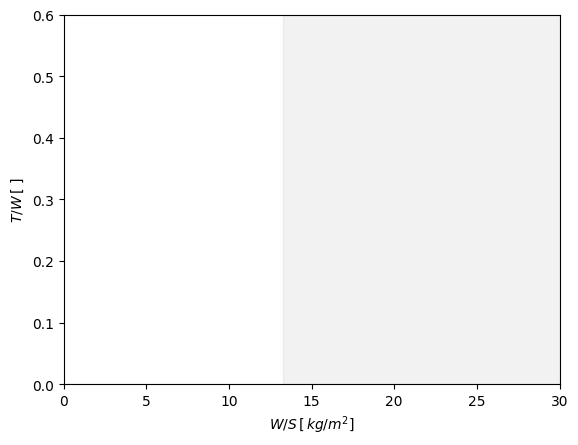

In [ ]:

WS_APP_Pa = Airplane.aero.qApproach_pa * Airplane.perf.CLmaxApproach_
WS_APP_kgm2 = WS_APP_Pa * 0.101971621
print('{:03.2f} kg/m^2'.format(WS_APP_kgm2))

WSlistAPP_kgm2 = [WS_APP_kgm2, Airplane.rest.WSmax_kgm2, Airplane.rest.WSmax_kgm2, WS_APP_kgm2, WS_APP_kgm2]
TWlistAPP = [0, 0, Airplane.rest.TWmax_, Airplane.rest.TWmax_, 0]
AppStallPoly = ConstraintPoly(WSlistAPP_kgm2, TWlistAPP, 'grey', 0.1)

figAPP, axAPP = plt.subplots()
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[\\,\\,]$')
axAPP.add_patch(AppStallPoly)

## Diagrama Completo

Text(0.35, 0.95, '\n Feaseble region\n')

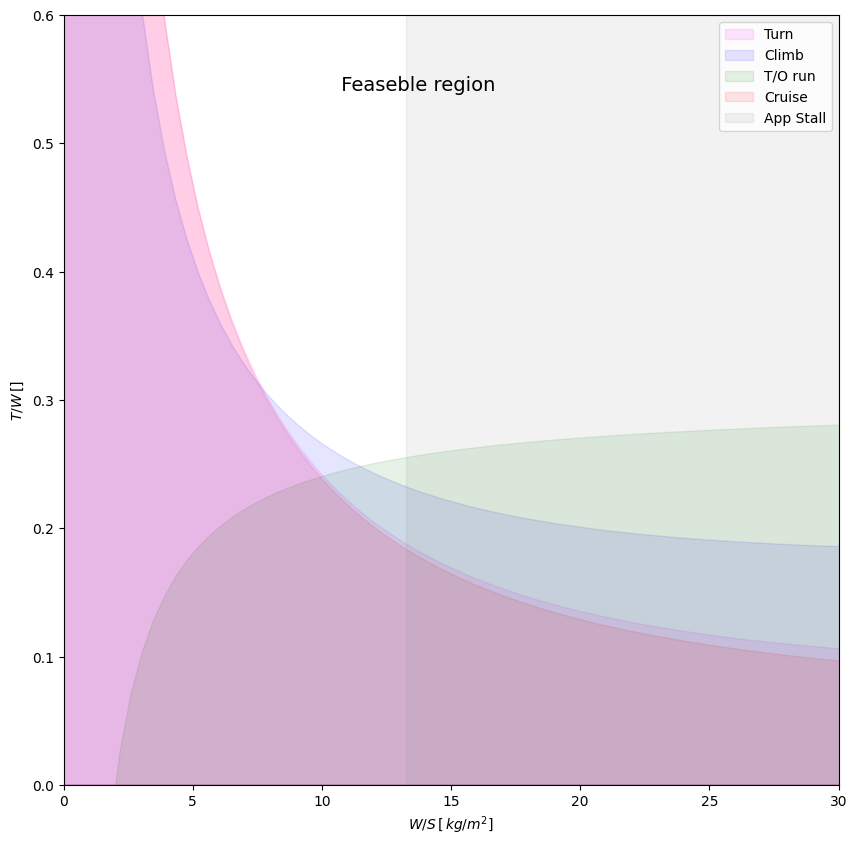

In [7]:
figCOMP = plt.figure(figsize=(10, 10))
axCOMP = figCOMP.add_subplot(111)
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.TWmax_, '$W/S\\,[\\,kg/m^2]$', '$T/W\\,[]$')

# Re-create the polygons for this figure
ConstVeloTurnPoly_COMP = ConstraintPoly(WSlistCVT_kgm2, TWlistCVT, 'magenta', 0.1)
RateOfClimbPoly_COMP = ConstraintPoly(WSlistROC_kgm2, TWlistROC, 'blue', 0.1)
TORunPoly_COMP = ConstraintPoly(WSlistGR_kgm2, TWlistGR, 'green', 0.1)
CruisePoly_COMP = ConstraintPoly(WSlistCR_kgm2, TWlistCR, 'red', 0.1)
AppStallPoly_COMP = ConstraintPoly(WSlistAPP_kgm2, TWlistAPP, 'grey', 0.1)

axCOMP.add_patch(ConstVeloTurnPoly_COMP)
axCOMP.add_patch(RateOfClimbPoly_COMP)
axCOMP.add_patch(TORunPoly_COMP)
axCOMP.add_patch(CruisePoly_COMP)
axCOMP.add_patch(AppStallPoly_COMP)

axCOMP.legend(['Turn', 'Climb', 'T/O run', 'Cruise', 'App Stall'])
textstr = '\n Feaseble region\n'
axCOMP.text(0.35, 0.95, textstr, transform=axCOMP.transAxes, fontsize=14, verticalalignment='top')

Text(0.05, 0.95, '\n The feasible aeroplane lives in this white space')

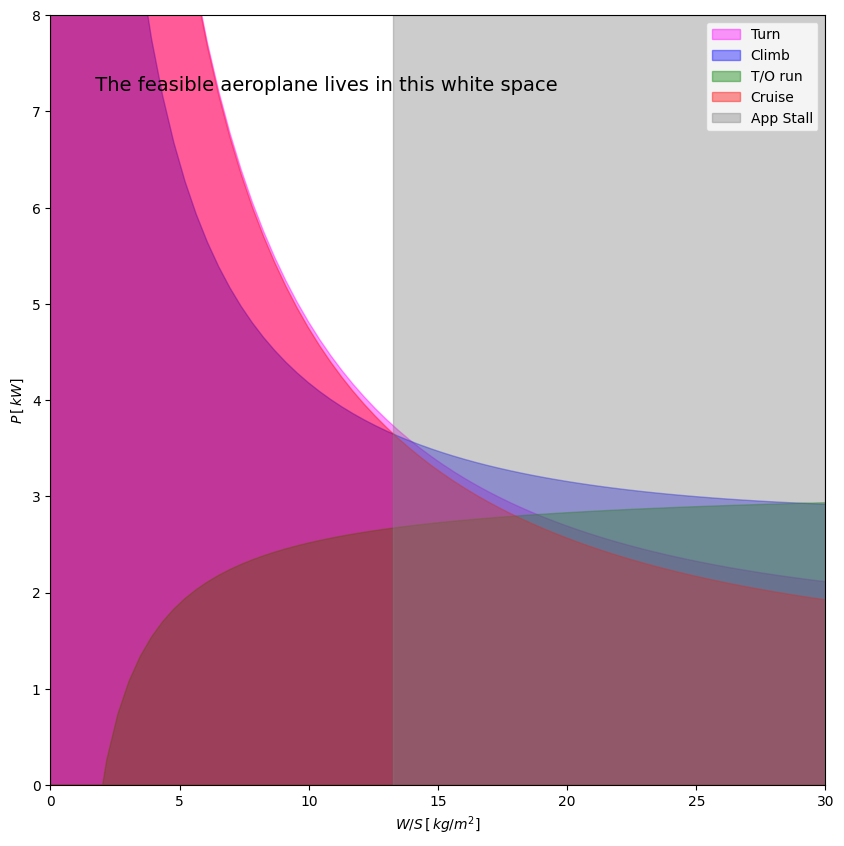

In [8]:
PropEff = 0.6

# Turn constraint (Curva nivelada)
PlistCVT_kW = []
for i, WS in enumerate(WSlistCVT_Pa):
	TW = Airplane.aero.qCruise_pa * ((Airplane.aero.CDmin_ / WS) + WS * Airplane.aero.k * (Airplane.perf.nTurn_ / Airplane.aero.qCruise_pa) ** 2)
	P_kW = 9.81 * TW * Airplane.peso.maxGrossWeight_kg * Airplane.perf.CruisingSpeed_mps / PropEff / (1.132 * Airplane.atm.CruisingAltDens_kgm3 / Airplane.atm.SeaLevelDens_kgm3 - 0.132) / 1000
	PlistCVT_kW.append(P_kW)

# Climb constraint (Razão de subida)
PlistROC_kW = []
for i, WS in enumerate(WSlistROC_Pa):
	TW = (Airplane.perf.RateOfClimb_mps / Airplane.perf.ClimbSpeed_mps +
		  Airplane.aero.CDmin_ * Airplane.aero.qClimb_pa / WS +
		  Airplane.aero.k * WS / Airplane.aero.qClimb_pa)
	P_kW = 9.81 * TW * Airplane.peso.maxGrossWeight_kg * Airplane.perf.ClimbSpeed_mps / PropEff / (1.132 * Airplane.atm.ClimbAltDens_kgm3 / Airplane.atm.SeaLevelDens_kgm3 - 0.132) / 1000
	PlistROC_kW.append(P_kW)

# Takeoff constraint (Decolagem)
PlistGR_kW = []
for i, WS in enumerate(WSlistGR_Pa):
	TW = (Airplane.perf.TakeOffSpeed_mps ** 2) / (2 * 9.81 * Airplane.perf.GroundRunTakeOff_m) + \
		 Airplane.aero.qTO_pa * Airplane.perf.CDTO_ / WS + \
		 Airplane.perf.muTO_ * (1 - Airplane.aero.qTO_pa * Airplane.perf.CLTO_ / WS)
	P_kW = 9.81 * TW * Airplane.peso.maxGrossWeight_kg * Airplane.perf.TakeOffSpeed_mps / PropEff / (1.132 * Airplane.atm.TakeOffDens_kgm3 / Airplane.atm.SeaLevelDens_kgm3 - 0.132) / 1000
	PlistGR_kW.append(P_kW)

# Cruise constraint (Cruseiro)
PlistCR_kW = []
for i, WS in enumerate(WSlistCR_Pa):
	TW = Airplane.aero.qCruise_pa * Airplane.aero.CDmin_ / WS + Airplane.aero.k * WS / Airplane.aero.qCruise_pa
	P_kW = 9.81 * TW * Airplane.peso.maxGrossWeight_kg * Airplane.perf.CruisingSpeed_mps / PropEff / (1.132 * Airplane.atm.CruisingAltDens_kgm3 / Airplane.atm.SeaLevelDens_kgm3 - 0.132) / 1000
	PlistCR_kW.append(P_kW)

# Approach constraint (Velocidade de aproximação)
WSlistAPP_kgm2 = [WS_APP_kgm2, Airplane.rest.WSmax_kgm2, Airplane.rest.WSmax_kgm2, WS_APP_kgm2, WS_APP_kgm2]
PlistAPP_kW = [0, 0, Airplane.rest.Pmax_kW, Airplane.rest.Pmax_kW, 0]

# Plotting
figCOMP = plt.figure(figsize=(10, 10))
axCOMP = figCOMP.add_subplot(111)
PlotSetUp(0, Airplane.rest.WSmax_kgm2, 0, Airplane.rest.Pmax_kW, '$W/S\\,[\\,kg/m^2]$', '$P\\,[\\,kW]$')

ConstVeloTurnPoly = ConstraintPoly(WSlistCVT_kgm2, PlistCVT_kW, 'magenta', 0.4)
axCOMP.add_patch(ConstVeloTurnPoly)
RateOfClimbPoly = ConstraintPoly(WSlistROC_kgm2, PlistROC_kW, 'blue', 0.4)
axCOMP.add_patch(RateOfClimbPoly)
TORunPoly = ConstraintPoly(WSlistGR_kgm2, PlistGR_kW, 'green', 0.4)
axCOMP.add_patch(TORunPoly)
CruisePoly = ConstraintPoly(WSlistCR_kgm2, PlistCR_kW, 'red', 0.4)
axCOMP.add_patch(CruisePoly)
AppStallPoly = ConstraintPoly(WSlistAPP_kgm2, PlistAPP_kW, 'grey', 0.4)
axCOMP.add_patch(AppStallPoly)

axCOMP.legend(['Turn', 'Climb', 'T/O run', 'Cruise', 'App Stall'])
textstr = '\n The feasible aeroplane lives in this white space'
axCOMP.text(0.05, 0.95, textstr, transform=axCOMP.transAxes, fontsize=14, verticalalignment='top')

In [9]:
ws = 13.25
p= 4

ar = Airplane.geo.AR_

s = ws / Airplane.peso.maxGrossWeight_kg

b = math.sqrt(ar*s)

print(b)

2.075150596944713
